# Milestone 6 - Elena Cai
### Simulating Innovation

In [1]:
import matplotlib
import random
import scipy
import pylab as plt
import math
import numpy as np

In [2]:
class Innovation_Simulation():
    
    def __init__(self, n, p_idea, p_share):
        self.n = n #size of space n*n
        self.p_i = p_idea #probability for each individual to come up with an idea
        self.p_s = p_share #probability for each individual to share idea
        self.max_idea = 0 #the number of idea that has been generated
        self.window = np.zeros([self.n, self.n]) #window that shows the states
        self.memory = [] #a list that stores all ideas and their stage
        for i in range(n*n):
            self.memory.append({})
        
        self.innovation = [] #count number of innovation
        self.max_idea_lst = [] #count number of unique innovation
        
    
    #initialize
    def initialize(self):
        #build a window of size n*n
        self.window = np.zeros([self.n, self.n])
    
    
    #visualize the system
    def observe(self):
        plt.cla()
        plt.imshow(self.window, cmap='flag')
       
    
    #randomly select a neighbor
    def select_neighbor(self,x,y):
        for i in range(20):
            r = random.random()
            
            #select right neighbor
            if r<0.25 and self.window[(x+1)%self.n, y]==0: 
                return (x+1)%self.n, y
            
            #select left neighbor
            elif r>=0.25 and r<0.5 and self.window[(x-1)%self.n, y]==0:
                return (x-1)%self.n, y
            
            #select top neighbor
            elif r>=0.5 and r<0.75 and self.window[x, (y-1)%self.n]==0:
                return x, (y-1)%self.n
            
            #select bottom neighbor
            elif r>=0.75 and self.window[x, (y+1)%self.n]==0: 
                return x, (y+1)%self.n
            
    
    #update an idea from the memory bank and show on window
    def idea_update(self, x,y):
        #if there is old idea
        if len(self.memory[self.n*y+x])!=0:
            #choose an idea to work on 
            #the idea that has been worked on more has greater chances of being chosen
            #create a probability distribution
            p = np.array(list(self.memory[self.n*y+x].values()))/sum(self.memory[self.n*y+x].values())
            #choose an idea based on the probability distribution
            choice = np.random.choice(list(self.memory[self.n*y+x].keys()),p=p)
            #update the idea stage in the memory list
            self.memory[self.n*y+x][choice]+=1

            #display the choice on window
            self.window[x,y]=choice

            #apply idea decay
            if len(self.memory[self.n*y+x])>1: #if the cell has more than one idea
                del_lst = []

                for i in self.memory[self.n*y+x]: 
                    if i != choice: #for all other ideas that the agent have
                        #decay the idea by half
                        self.memory[self.n*y+x][i]-=1/2*self.memory[self.n*y+x][i]

                        #delete the idea below a threshold
                        if self.memory[self.n*y+x][i]<=0.1:
                            del_lst.append(i)

                #delete ideas below the threshold
                for j in del_lst:
                    del(self.memory[self.n*y+x][j])
                del_lst = []
            return(choice)
    
    
    #update the system
    def update(self):    
        self.window = np.zeros([self.n, self.n])
                
        #each cell will share ideas for p_s probability
        for x in range(self.n):
            for y in range(self.n):
                if self.window[x,y] == 0:
                    
                    #share the cell to one neighbor
                    r = random.random()
                    if r < self.p_s/2:
                        #update the window and the cell
                        choice = self.idea_update(x,y)
                        if choice != None:                            
                            neighbor = self.select_neighbor(x,y)
                            if neighbor != None:
                                neighbor_index = self.n * neighbor[1] + neighbor[0]
                                self.window[neighbor]=choice
                                if choice not in self.memory[neighbor_index]:
                                    self.memory[neighbor_index][choice]=self.memory[self.n*y+x][choice]
                                else: 
                                    max_stage = max(self.memory[neighbor_index][choice], self.memory[self.n*y+x][choice])
                                    self.memory[neighbor_index][choice] = max_stage
                                    self.memory[self.n*y+x][choice] = max_stage
                                
        
        #each node will genertae idea for p_i probability
        for x in range(self.n):
            for y in range(self.n):
                if self.window[x,y] == 0:
                    r_2 = random.random()
                    if r_2 < self.p_i:
                        self.max_idea += 1 #add one idea
                        self.window[x,y] = self.max_idea #update window
                        #update idea stage at memory list
                        self.memory[self.n*y+x][self.max_idea] = 1 

        
        #other cells will update an old idea
        for x in range(self.n):
            for y in range(self.n):
                if self.window[x,y]==0:
                    self.idea_update(x,y)
        
        
        #find the overall state of the system
        rank = np.unique(self.window, return_counts=True)
        max_freq = max(rank[1])
        max_idea = list(rank[0])[list(rank[1]).index(max_freq)]
        self.max_idea_lst.append(max_idea)
        
        #print(max_idea, max_freq)
        
        #identify innovation
        if max_freq >= (self.n*self.n)/3 and max_idea != 0:
            #print("Innovation!")
            self.innovation.append(max_idea)
        
        return max_idea

# Case Analysis

### All cells come up with an idea for the first step; All cells share ideas in the following steps.

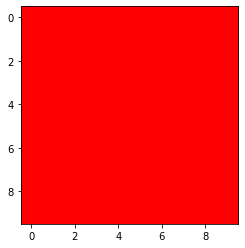

In [5]:
sim_1 = Innovation_Simulation(n=10, p_idea=1, p_share=1)
sim_1.observe()

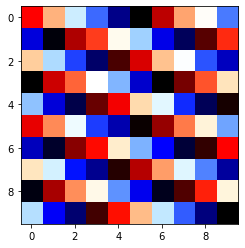

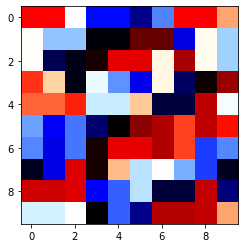

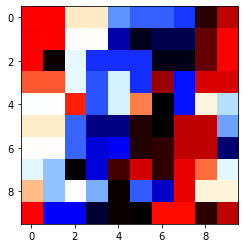

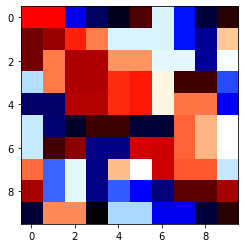

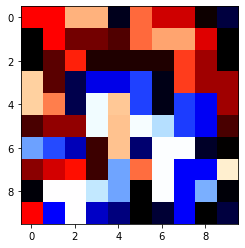

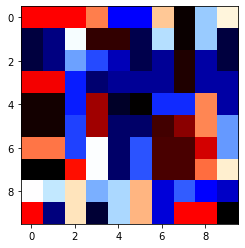

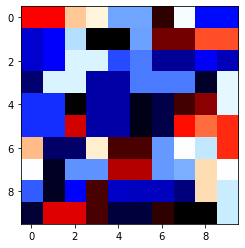

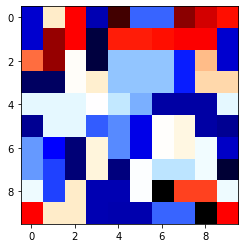

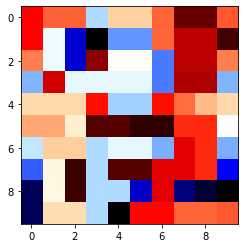

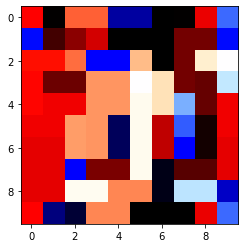

In [6]:
for i in range(10):
    sim_1.update()
    sim_1.observe()
    plt.show()

### All cells come up with an idea at each step; No cell share ideas.

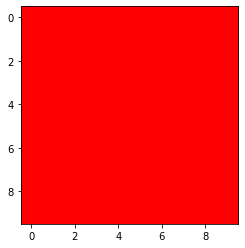

In [7]:
sim_2 = Innovation_Simulation(n=10, p_idea=1, p_share=0)
sim_2.observe()

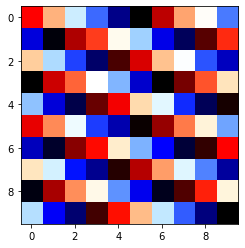

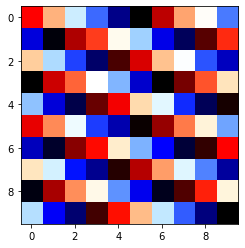

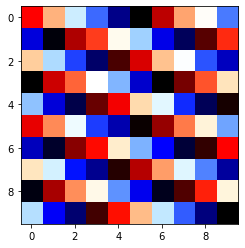

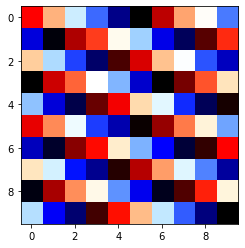

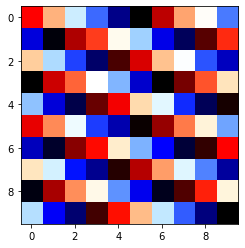

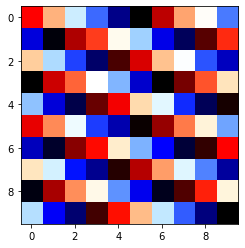

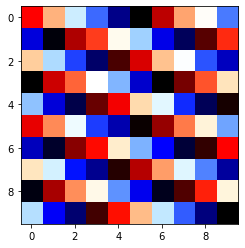

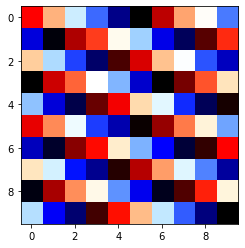

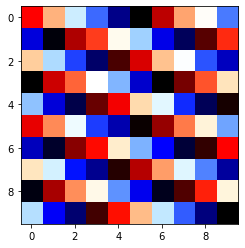

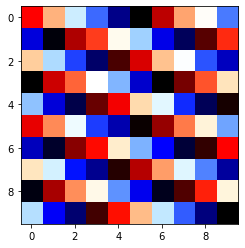

In [8]:
for i in range(10):
    sim_2.update()
    sim_2.observe()
    plt.show()

### Half of the cells share ideas; The rest come up with ideas

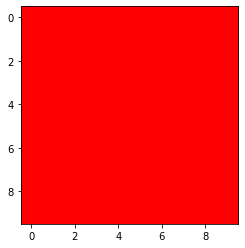

In [9]:
sim_3 = Innovation_Simulation(n=10, p_idea=1, p_share=0.5)
sim_3.observe()

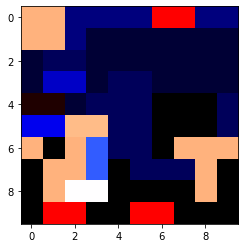

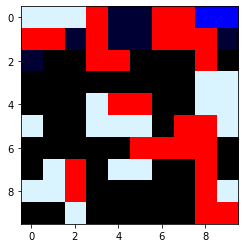

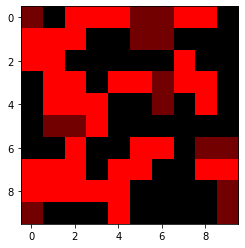

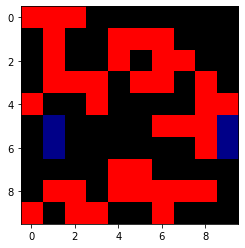

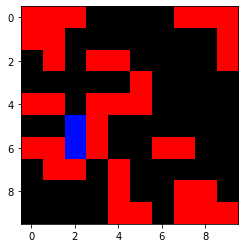

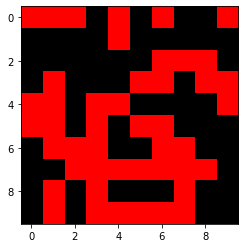

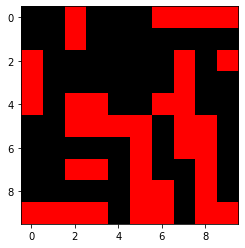

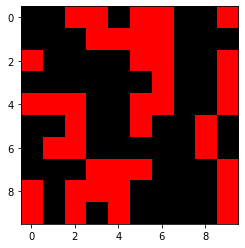

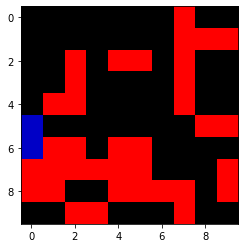

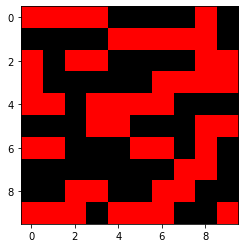

In [10]:
for i in range(10):
    for i in range(100):
        sim_3.update()
    sim_3.observe()
    plt.show()

In [62]:
len(np.unique(sim_3.innovation))

1

### Histagram of implemnting 20 iterations for p_s = 0.5 and p_i = 0.5

In [11]:
list_hist = []

for i in range(1000): #1000 iterations
    sim = Innovation_Simulation(n=5, p_idea=0.5, p_share=0.5)
    for j in range(100): #100 updates
        sim.update()
    list_hist.append(len(np.unique(sim.innovation)))

(array([393.,   0.,   0., 482.,   0.,   0., 121.,   0.,   0.,   4.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

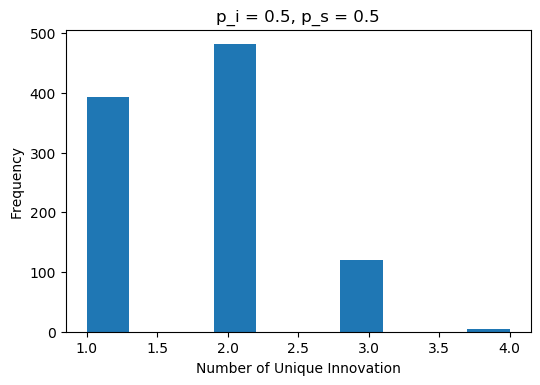

In [12]:
plt.figure(dpi=100)
plt.title('p_i = 0.5, p_s = 0.5')
plt.xlabel('Number of Unique Innovation')
plt.ylabel('Frequency')
plt.hist(list_hist)

### Keep p_s as 0.5; Adjust the p_i rate

In [13]:
p_i = np.linspace(0,1,100)
unique_innovation_list_1 = []

for p_i in p_i: 
    sub_list = []
    for iteration in range(20): #20 iterations
        sim = Innovation_Simulation(n=5, p_idea=p_i, p_share=0.5)
        for i in range(100): #100 updates
            sim.update()
        sub_list.append(len(np.unique(sim.innovation)))
    unique_innovation = np.mean(sub_list)
    #print(unique_innovation)
    unique_innovation_list_1.append(unique_innovation)

Text(0.5, 1.0, 'p_s = 0.5')

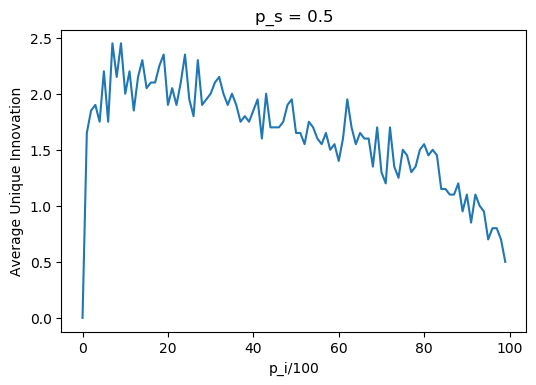

In [14]:
plt.figure(dpi=100)
plt.plot(unique_innovation_list_1)
plt.xlabel("p_i/100")
plt.ylabel("Average Unique Innovation")
plt.title("p_s = 0.5")

### Keep p_i as 0.5; Adjust the p_s rate

In [ ]:
p_s = np.linspace(0,1,100)
unique_innovation_list_2 = []

for p_s in p_s: 
    sub_list = []
    for iteration in range(20): #20 iterations
        sim = Innovation_Simulation(n=5, p_idea=0.5, p_share=p_s)
        for i in range(100): #100 updates
            sim.update()
        sub_list.append(len(np.unique(sim.innovation)))
    unique_innovation = np.mean(sub_list)
    #print(unique_innovation)
    unique_innovation_list_2.append(unique_innovation)

Text(0.5, 1.0, 'p_i = 0.5')

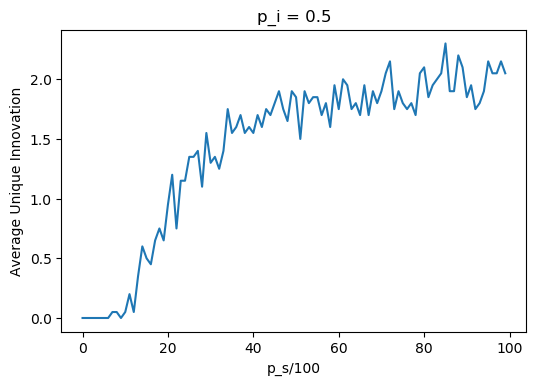

In [117]:
plt.figure(dpi=100)
plt.plot(unique_innovation_list_2)
plt.xlabel("p_s/100")
plt.ylabel("Average Unique Innovation")
plt.title("p_i = 0.5")

### Changing both p_i and p_s

In [122]:
p_i = np.linspace(0,1,10)
p_s = np.linspace(0,1,10)
unique_innovation_list = np.zeros([10,10])

for i in range(10):
    for s in range(10):
        sub_list = []
        for iteration in range(10):
            sim = Innovation_Simulation(n=5, p_idea=p_i[i], p_share=p_s[s])
            for update in range(100):
                sim.update()
            sub_list.append(len(np.unique(sim.innovation)))
        average = np.mean(sub_list)
        unique_innovation_list[i,s]=average

In [86]:
unique_innovation_list

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 1.7, 2. , 2.4, 2.4, 2.8, 2.4, 2.1, 1.7],
       [0. , 0.4, 1.8, 1.6, 1.9, 2.4, 2. , 2.4, 2.4, 1.9],
       [0. , 0.5, 1.4, 1.5, 2.1, 1.9, 1.9, 2.1, 2.2, 2.7],
       [0. , 0.1, 0.9, 1.6, 1.8, 1.9, 1.9, 1.7, 2. , 2.7],
       [0. , 0. , 0.7, 1.4, 1.6, 1.4, 1.7, 1.7, 2.1, 2.3],
       [0. , 0. , 0.2, 1.2, 1.2, 1.5, 2. , 1.5, 1.7, 1.7],
       [0. , 0. , 0.1, 0.8, 1.7, 1.1, 1.8, 1.8, 1.7, 2.3],
       [0. , 0. , 0. , 0.6, 0.9, 1.3, 1.3, 1.9, 1.5, 2. ],
       [0. , 0. , 0. , 0. , 0.4, 1.3, 1.4, 1.3, 1.8, 1.7]])

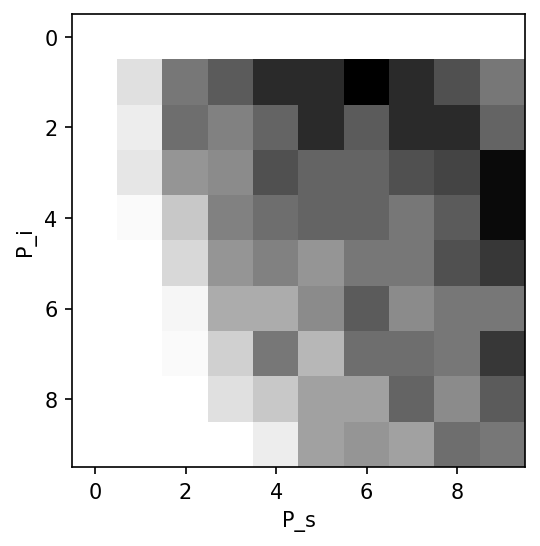

In [98]:
plt.figure(dpi=150)
plt.xlabel("P_s/10")
plt.ylabel("P_i/10")
plt.imshow(unique_innovation_list, cmap='Greys')


### Confidence Interval Analysis

In [174]:
list_ci = []

for i in range(1000):
    sim = Innovation_Simulation(n=5, p_idea=0.5, p_share=0.5)
    for j in range(100):
        sim.update()
    list_ci.append(len(np.unique(sim.innovation)))
    
average = np.mean(list_ci)
sd = np.std(list_ci)

print(average, 1.96*sd)

1.733 1.2967307267123735


### Idea Donimance Analysis

In [169]:
time = np.linspace(100,10000,100) #change umber of updates
unique_innovation_list_d = []

for i in range(100): 
    sub_list = []
    for iteration in range(10):
        sim = Innovation_Simulation(n=5, p_idea=0.5, p_share=0.5)
        for j in range(int(time[i])):
            sim.update()
        sub_list.append(len(np.unique(sim.innovation)))
    unique_innovation = np.mean(sub_list)
    #print(unique_innovation)
    unique_innovation_list_d.append(unique_innovation)

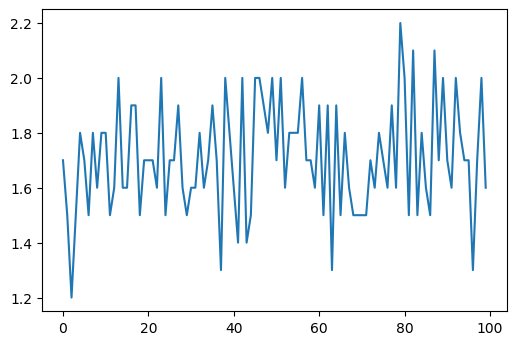

In [173]:
plt.figure(dpi=100)
plt.xlabel("number of updates")
plt.ylabel("average number of unique innovation")
plt.plot(unique_innovation_list_d)